# Step 1: Load and Explore the Data

We begin by importing the necessary libraries, loading the dataset, and checking its structure and missing values.


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
df = pd.read_csv('ifAffordable.csv')

# Basic data overview
print("Dataframe Info:")
print(df.info())

print("\nFirst 5 rows:")
print(df.head())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15514 entries, 0 to 15513
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DI                   15514 non-null  int64  
 1   TradeValue           15514 non-null  float64
 2   RealmType            15514 non-null  object 
 3   Enclave              15514 non-null  object 
 4   LivingQuarters       15514 non-null  float64
 5   ParcelSize           15514 non-null  float64
 6   ParcelSizeUnit       15514 non-null  object 
 7   StructuralIntegrity  15514 non-null  int64  
 8   ExteriorCharm        15514 non-null  object 
 9   AffordableDwelling   15514 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 1.2+ MB
None

First 5 rows:
   DI  TradeValue    RealmType      Enclave  LivingQuarters  ParcelSize  \
0   0    269500.0  Meadowlands  Brightforge          2143.0      7939.0   
1   0    269500.0  Meadowlands  Brightforge

# Step 2: Encode Categorical Features

We one-hot encode the categorical columns to prepare the data for modeling.


In [9]:
# One-hot encode categorical features
categorical_features = ['RealmType', 'Enclave', 'ExteriorCharm', 'ParcelSizeUnit']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

print("\nColumns after one-hot encoding:")
print(df_encoded.columns)



Columns after one-hot encoding:
Index(['DI', 'TradeValue', 'LivingQuarters', 'ParcelSize',
       'StructuralIntegrity', 'AffordableDwelling', 'RealmType_GnomeBurough',
       'RealmType_Meadowlands', 'Enclave_Cloudrest', 'Enclave_Crystalhollow',
       'Enclave_Dragonspire', 'Enclave_Dreamweaver', 'Enclave_Duskwood',
       'Enclave_Emberfall', 'Enclave_Glimmerwood', 'Enclave_Moonglade',
       'Enclave_Mossheart', 'Enclave_Mystvale', 'Enclave_Nighthaven',
       'Enclave_Oakenshade', 'Enclave_Petalbridge', 'Enclave_Ravenstone',
       'Enclave_Riverbend', 'Enclave_Shadowmere', 'Enclave_Silverglen',
       'Enclave_Starfall', 'Enclave_Stormhold', 'Enclave_Stormwatch',
       'Enclave_Sunspire', 'Enclave_Thornfield', 'Enclave_Verdantia',
       'Enclave_Windwhisper', 'Enclave_Wolfsbane', 'Enclave_Wyverncliff',
       'ExteriorCharm_Enchanting', 'ExteriorCharm_Gleaming',
       'ExteriorCharm_Modest'],
      dtype='object')


# Step 3: Select Features and Target

We define our predictor variables and target (TradeValue). The identifier and affordability flag are excluded.


In [10]:
# Define predictors (X) and target variable (y)
X = df_encoded.drop(columns=['DI', 'TradeValue', 'AffordableDwelling'])
y = df_encoded['TradeValue']

print("\nSelected Predictor Columns (first few rows):")
print(X.head())



Selected Predictor Columns (first few rows):
    LivingQuarters  ParcelSize  StructuralIntegrity  RealmType_GnomeBurough  \
0           2143.0      7939.0                    5                   False   
3            923.0     10083.0                    5                   False   
6            959.0      9439.0                    5                    True   
10           798.0      3869.0                    6                   False   
32          1172.0     11344.0                    5                   False   

    RealmType_Meadowlands  Enclave_Cloudrest  Enclave_Crystalhollow  \
0                    True              False                  False   
3                    True              False                  False   
6                   False              False                  False   
10                   True              False                  False   
32                   True              False                  False   

    Enclave_Dragonspire  Enclave_Dreamweaver  Enclav

# Step 4: Train the Linear Regression Model

We split the data into training and testing sets and fit a linear regression model.


In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predict on test set
y_pred = reg_model.predict(X_test)


# Step 5: Evaluate the Model

We evaluate the model using Mean Absolute Error (MAE) and Mean Squared Error (MSE).


In [12]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\nRegression Model Evaluation:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)



Regression Model Evaluation:
Mean Absolute Error (MAE): 27129.804221700837
Mean Squared Error (MSE): 1794270658.6192174


# Step 6: Analyze Model Coefficients

Let’s review the model coefficients to see how each feature influences predictions.


In [13]:
# Show model coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': reg_model.coef_
})
print("\nModel Coefficients:")
print(coef_df)



Model Coefficients:
                     Feature    Coefficient
0             LivingQuarters      70.977933
1                 ParcelSize       0.919237
2        StructuralIntegrity    6181.596726
3     RealmType_GnomeBurough  -20372.297332
4      RealmType_Meadowlands  -10756.162942
5          Enclave_Cloudrest    -136.014616
6      Enclave_Crystalhollow    7719.389734
7        Enclave_Dragonspire   -4336.933448
8        Enclave_Dreamweaver   27348.166139
9           Enclave_Duskwood   11352.783877
10         Enclave_Emberfall   -8355.609475
11       Enclave_Glimmerwood   99242.958503
12         Enclave_Moonglade   68676.581775
13         Enclave_Mossheart   46783.330567
14          Enclave_Mystvale  -31224.966146
15        Enclave_Nighthaven   12238.828953
16        Enclave_Oakenshade   21245.645028
17       Enclave_Petalbridge  -25290.358511
18        Enclave_Ravenstone   41305.279841
19         Enclave_Riverbend   98698.650663
20        Enclave_Shadowmere  -23223.250391
21        E

# Step 7: Visualize Predictions

We plot actual vs. predicted TradeValue to visually assess model performance.


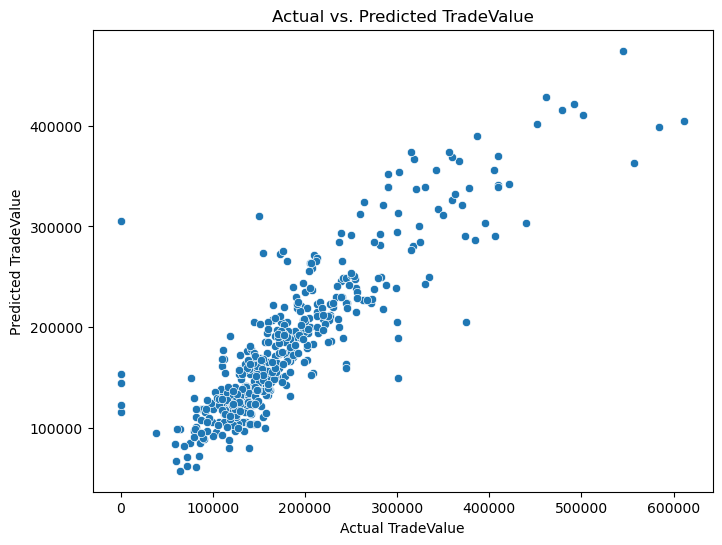

In [14]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual TradeValue")
plt.ylabel("Predicted TradeValue")
plt.title("Actual vs. Predicted TradeValue")
plt.show()
